In [1]:
# google.cloud import bigquery

#client= bigquery.Client()

In [2]:
# BigQuery
from google.cloud import bigquery
from google.cloud import storage

bigquery_client = bigquery.Client(project='bigquery-public-data')
storage_client = storage.Client(project='bigquery-public-data')


client = bigquery.Client(project='bigquery-public-data')
#this is the database 

#create a client object

dataset_ref=client.dataset('fdic_banks')
#this is the dataset in bigquery-public data I want to look at 

dataset=client.get_dataset(dataset_ref)


bigquery_client
dataset

Dataset(DatasetReference('bigquery-public-data', 'fdic_banks'))

Went onto BigQuery Google, looked at some top open data sets, and found fdic_banks data which sounded interesting to manipulate. 

In [3]:
tables=list(client.list_tables(dataset_ref)) 
#list all the tables in the dataset fdicbank from the database

for table in tables:
        print(table.table_id)


institutions
locations


I see that there are two tables in the content, intitutions and locations, at this point I can convert these pulled data sets for other ML/AI purposes

In [4]:
#defining the call for the tables from client > bigquery_client(my projcet)> my dataset > that has the tables 
locations_table_ref=dataset_ref.table("locations")   
institutions_table_ref=dataset_ref.table("institutions")


print(locations_table_ref) #this is the full call for the data <big data set> -> <project> -> <table of choice> 
print(institutions_table_ref)

bigquery-public-data.fdic_banks.locations
bigquery-public-data.fdic_banks.institutions


In [5]:
locations_table=client.get_table(locations_table_ref)

institutions_table=client.get_table(institutions_table_ref)

In [6]:
#locations_table.schema

In [7]:
#institutions_table.schema

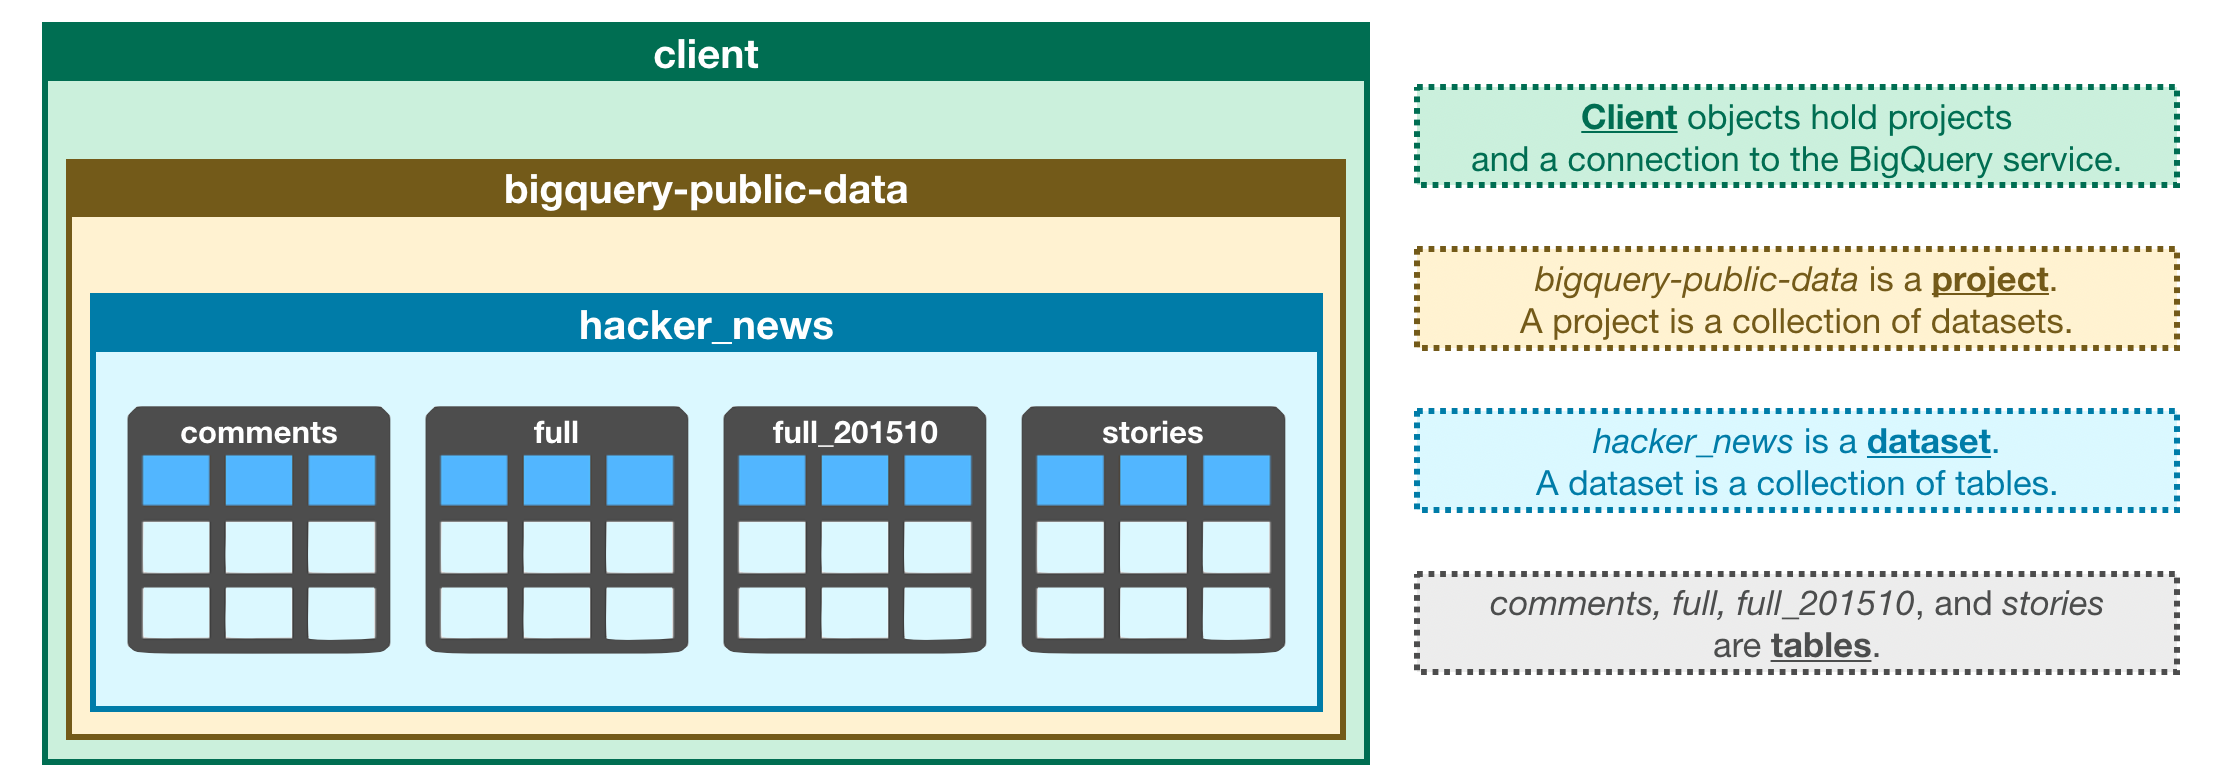

for my example, we have tables locations & institutions, however we are not using client object

In [8]:
# Preview the first five lines of the "full" table
client.list_rows(institutions_table, max_results=5).to_dataframe()   #list top 5 data points from the table as a dataframe


,fdic_certificate_number,institution_name,state_name,fdic_id,docket,active,address,total_assets,bank_charter_class,change_code_1,...,csa_name,csa_fips_code,csa_indicator,cbsa_name,cbsa_fips_code,cbsa_metro_flag,cbsa_micro_flag,cbsa_division_name,cbsa_division_fips_code,cbsa_division_flag
0,21314,The First National Bank of Autauga County,Alabama,14751,0,False,744 East Main Street,NaN,N,223,...,"Montgomery-Selma-Alexander City, AL",388,True,"Montgomery, AL",33860,True,False,None,None,False
1,15722,Baldwin National Bank,Alabama,9984,0,False,Milwaukee And Ohio Streets,NaN,N,223,...,"Mobile-Daphne-Fairhope, AL",380,True,"Daphne-Fairhope-Foley, AL",19300,True,False,None,None,False
2,21103,State Bank of the Gulf,Alabama,14586,0,False,West 18th Avenue And Highway 59,NaN,NM,223,...,"Mobile-Daphne-Fairhope, AL",380,True,"Daphne-Fairhope-Foley, AL",19300,True,False,None,None,False
3,21466,First National Bank of Alabama-Daphne,Alabama,14846,0,False,2211 Highway 98,NaN,N,223,...,"Mobile-Daphne-Fairhope, AL",380,True,"Daphne-Fairhope-Foley, AL",19300,True,False,None,None,False
4,19477,Central Bank of Eufaula,Alabama,13277,0,False,223 East Broad Street,NaN,NM,223,...,None,None,False,"Eufaula, AL-GA",21640,False,True,None,None,False


In [9]:
client.list_rows(locations_table, max_results=5).to_dataframe()


,fdic_certificate_number,institution_name,branch_name,branch_number,main_office,branch_address,branch_city,zip_code,branch_county,county_fips_code,...,cbsa_metro_name,cbsa_micro_flag,csa_flag,csa_fips_code,csa_name,date_established,fdic_uninum,last_updated,service_type,branch_fdic_uninum
0,18600,SunSouth Bank,CLIO BRANCH,1,False,3274 Louisville Street,Clio,36017,Barbour,01005,...,None,True,False,None,None,2002-06-17,12486,2022-10-14,11,363899
1,4988,Trustmark National Bank,BANKTRUST OF ALABAMA BRANCH,276,False,218-220 East Broad Street,Eufaula,36027,Barbour,01005,...,None,True,False,None,None,1926-01-01,3327,2022-10-14,11,6141
2,6384,"PNC Bank, National Association",EUFAULA SQUARE BRANCH,4716,False,1009 South Eufaula Avenue,Eufaula,36027,Barbour,01005,...,None,True,False,None,None,1972-08-23,4287,2022-10-14,11,248463
3,16910,22nd State Bank,EUFAULA AVENUE BRANCH,1,False,21 Eufaula Avenue,Clayton,36016,Barbour,01005,...,None,True,False,None,None,1992-12-07,10995,2022-10-14,11,239519
4,16910,22nd State Bank,22nd State Bank,0,True,1920 Main St,Louisville,36048,Barbour,01005,...,None,True,False,None,None,1917-01-01,10995,2022-10-14,11,10995


Query time! Works perfectly fine inside of console.google.cloud bigquery, though want to bring to this enviornment df for ML/DL/AI applications & visualization desired for hubble personal project. 


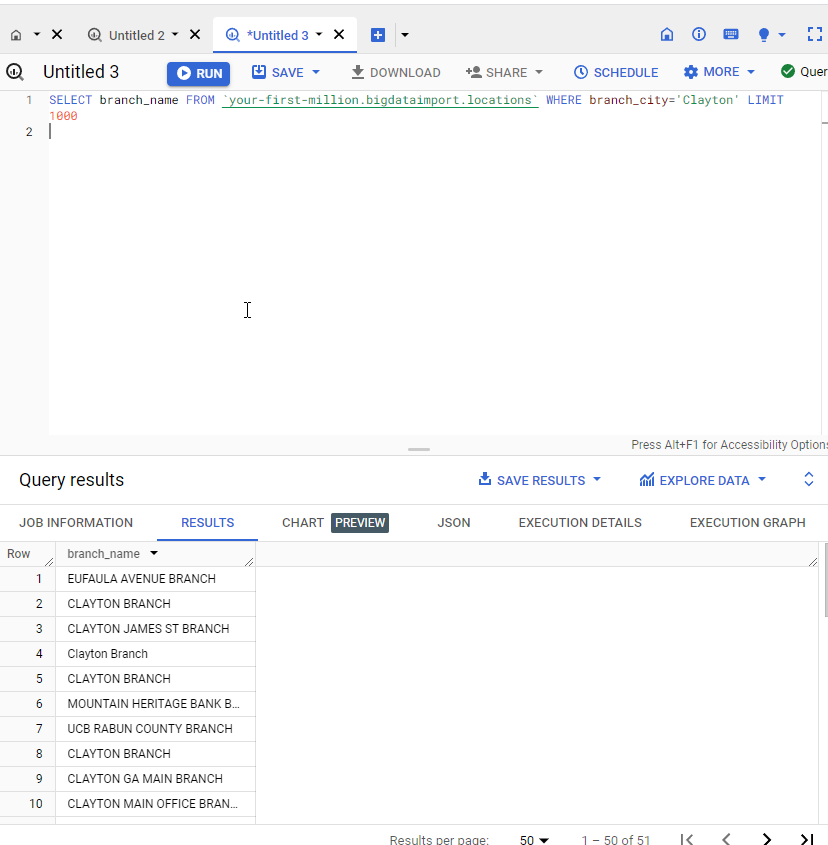

In [10]:
query = """
        SELECT branch_name
        FROM `bigquery-public-data.fdic_banks.locations`
        WHERE branch_city = 'Clayton'
        """

In [11]:
# Set up the query
#query_job = client.query(query)

# no permission to creat permissions in poject, this excersize ends here :)

So, even though it's a public database, I have to upload it to my google cloud and have permissions to access it. Which is fine, I will pivot to working with my Spotify dataset and complete queries with it.

From there, I will focus on Hubble telescope data and try and take and parse data from there and upload it to my own dataset for usage. 

NVM

first I import all of this data into my personal project 


In [12]:
# BigQuery
from google.cloud import bigquery
from google.cloud import storage

bigquery_client = bigquery.Client(project='your-first-million')
storage_client = storage.Client(project='your-first-million')


client = bigquery.Client(project='your-first-million')
dataset_ref=client.dataset('bigdataimport')


To enable this, need to enable bigquery & cloud storage addons in top toolbar.


In [13]:
tables = list(client.list_tables('your-first-million.bigdataimport'))

for table in tables:  
    print(table.table_id)

institutions
locations


In [14]:
institutions_table_ref = dataset_ref.table("institutions")
locations_table_ref=dataset_ref.table("locations")   

In [15]:
client.get_table(locations_table_ref)

Table(TableReference(DatasetReference('your-first-million', 'bigdataimport'), 'locations'))

In [16]:
institutions_table=client.get_table(institutions_table_ref)
locations_table=client.get_table(locations_table_ref)

locations_table

Table(TableReference(DatasetReference('your-first-million', 'bigdataimport'), 'locations'))

In [17]:
#institutions_table.schema

In [18]:
query = """
        SELECT branch_name
        FROM `your-first-million.bigdataimport.locations`
        WHERE branch_city = 'Irvine'
        """

query_job = client.query(query)


query_df=query_job.to_dataframe()

print(query_df)

                                 branch_name
0                              IRVINE BRANCH
1                              IRVINE BRANCH
2                         WEST IRVINE BRANCH
3                  IRVINE YALE AVENUE BRANCH
4                   IRVINE ALBERTSONS BRANCH
..                                       ...
91                             IRVINE BRANCH
92  IRVINE SAND CANYON BANKING CENTER BRANCH
93                   HARVARD AND MAIN BRANCH
94                         Irvine LPO Branch
95                             Irvine Branch

[96 rows x 1 columns]


This is effectively pulling queries from my cloud database and putting it into a dataframe I can then apply ML techniques onto succesfully. 


Let me practice with some queries on the spotify playlist first now, then import hubble telescope data for specific regions to be parsed and used to support my CalTech research

In [19]:
dataset_ref2=client.dataset('SQL_Gagnier')

tables2 = list(client.list_tables('your-first-million.SQL_Gagnier'))

In [20]:
for table in tables2:  
    print(table.table_id)

DDL
gcp_billing_export_v1_011583_E1A542_DF13B1


In [21]:
spotify_table_ref = dataset_ref2.table("DDL")
spotify_table=client.get_table(spotify_table_ref)

In [22]:
spotify_table

Table(TableReference(DatasetReference('your-first-million', 'SQL_Gagnier'), 'DDL'))

In [23]:
client.list_rows(spotify_table, max_results=5).to_dataframe()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,4YaU1EjXIkdRdkOI4cCZys,Signs - Eden Prince Remix,Starley,56,249wM0bMES3O4nFuwARq9i,Signs (Eden Prince Remix),2018-11-30,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-7.510,0,0.0841,0.1070,0.000030,0.374,0.503,121.993,172000
1,7FDaS1k08rwMoAThmzUkOZ,Side Effects - Fedde Le Grand Remix,The Chainsmokers,63,3Yb3f9PL7aBpjuJPyiV0ot,Side Effects - Remixes,2018-07-25,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-4.046,0,0.0432,0.0382,0.000028,0.434,0.659,126.026,172360
2,1BmdqDrBU5eohtRwHBls6C,joy. (R3HAB Remix),for KING & COUNTRY,56,2gGMD56Y8DAvIzpoYfA014,joy. (R3HAB Remix),2019-01-25,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-4.607,0,0.0572,0.0917,0.000016,0.111,0.480,120.038,171500
3,3utdq3dPLVD4r7Vv9BnCAI,What Am I - SONDR Remix,Why Don't We,52,1UmAfO69MdjI20N6etueHb,What Am I (SONDR Remix),2019-11-01,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,-5.283,0,0.0419,0.0336,0.000084,0.277,0.509,118.020,180361
4,5cE201rNvIkryS8N1dJ5nR,Now That I Found You,Carly Rae Jepsen,5,1xqz6l2gObcbw25EqODDCt,Now That I Found You / No Drug Like Me,2019-02-27,Dance Pop,37i9dQZF1DWZQaaqNMbbXa,pop,...,0,-5.154,0,0.0476,0.0145,0.000000,0.107,0.574,124.169,200318


To practice queries using: 
https://www.w3schools.com/sql/sql_where.asp
documentation to assist with commands 

In [24]:
Music_query = """
        SELECT track_artist
        FROM `your-first-million.SQL_Gagnier.DDL`
        WHERE playlist_id = '37i9dQZF1DXcZDD7cfEKhW'
        """

Music_query_job = client.query(Music_query)
Music_query_df1=Music_query_job.to_dataframe()
print(Music_query_df1)

#create a df with a single column of artists on a specific playlist 

          track_artist
0              Starley
1     The Chainsmokers
2   for KING & COUNTRY
3         Why Don't We
4         Zara Larsson
..                 ...
65    The Chainsmokers
66       Lewis Capaldi
67        Charlie Puth
68        Zara Larsson
69         Herve Pagez

[70 rows x 1 columns]


In [25]:
Music_query = """
        SELECT track_artist
        FROM `your-first-million.SQL_Gagnier.DDL`
        """

Music_query_job = client.query(Music_query)
Music_query_df2=Music_query_job.to_dataframe()
print(Music_query_df2)

#create a df with just track artists 

             track_artist
0                 Starley
1        The Chainsmokers
2      for KING & COUNTRY
3            Why Don't We
4        Carly Rae Jepsen
...                   ...
32828       Diego Miranda
32829               R3HAB
32830            Afrojack
32831            Hardwell
32832             Showtek

[32833 rows x 1 columns]


In [26]:
Music_query = """
        SELECT track_artist
        FROM `your-first-million.SQL_Gagnier.DDL`
        ORDER BY tempo ASC;
        """

Music_query_job = client.query(Music_query)
Music_query_df3=Music_query_job.to_dataframe()
print(Music_query_df3)

#create a df with just track artists ordered by their tempo ascending

             track_artist
0        DREAMS COME TRUE
1            Davina Leone
2              Paul Simon
3       charlie toØ human
4           Nat King Cole
...                   ...
32828                Pomo
32829        Rob Stepwart
32830              Swardy
32831  Cabela and Schmitt
32832      Spanish F.L.Y.

[32833 rows x 1 columns]


In [27]:
Music_query = """
        SELECT track_artist
        FROM `your-first-million.SQL_Gagnier.DDL`
        ORDER BY tempo DESC;
        """

Music_query_job = client.query(Music_query)
Music_query_df3=Music_query_job.to_dataframe()
print(Music_query_df3)

#create a df with just track artists ordered by their tempo descending

             track_artist
0          Spanish F.L.Y.
1      Cabela and Schmitt
2                  Swardy
3            Rob Stepwart
4                    Pomo
...                   ...
32828       Nat King Cole
32829   charlie toØ human
32830          Paul Simon
32831        Davina Leone
32832    DREAMS COME TRUE

[32833 rows x 1 columns]


In [28]:
Music_query = """
        SELECT track_name
        FROM `your-first-million.SQL_Gagnier.DDL`
        ORDER BY duration_ms DESC LIMIT 5;
        """


Music_query_job = client.query(Music_query)
Music_query_df4=Music_query_job.to_dataframe()
print(Music_query_df4)

#create a df with longest 5 song names 

                        track_name
0                       47 - Remix
1          Kashmir - 2012 Remaster
2          Kashmir - 2012 Remaster
3                     American Pie
4  Jam On It (Re-Recorded Version)


In [29]:
Music_query = """
        SELECT track_name
        FROM `your-first-million.SQL_Gagnier.DDL`
        ORDER BY duration_ms DESC LIMIT 5;
        """


Music_query_job = client.query(Music_query)
Music_query_df5=Music_query_job.to_dataframe()
print(Music_query_df5)

#create a df with longest 5 song names 

                        track_name
0                       47 - Remix
1          Kashmir - 2012 Remaster
2          Kashmir - 2012 Remaster
3                     American Pie
4  Jam On It (Re-Recorded Version)


In [30]:
Music_query = """
        SELECT track_name
        FROM `your-first-million.SQL_Gagnier.DDL`
        WHERE danceability >0.75 AND valence > 0.75 AND energy > 0.75;
        """


Music_query_job = client.query(Music_query)
Music_query_df6=Music_query_job.to_dataframe()
print(Music_query_df6)

#create a df of track names of songs w/ above certain thresholds
#this will translate perfectly into pulling ra/dec rows 

                                  track_name
0                             Rebota - Remix
1                                   AM To PM
2     A Night to Remember - Original Version
3              Troublemaker (feat. Flo Rida)
4                                   Burreros
...                                      ...
1147                                     BOP
1148                             걔 세 I'm Him
1149                            Fcukin Beats
1150                     Miracles - Club Mix
1151                             Trap 4 Real

[1152 rows x 1 columns]


In [31]:
Music_query = """
        SELECT AVG(energy)
        FROM `your-first-million.SQL_Gagnier.DDL`
        """


Music_query_job = client.query(Music_query)
Music_query_df7=Music_query_job.to_dataframe()
print(Music_query_df7)

#create a df that has a single cell of average of energy column 

        f0_
0  0.698619


In [32]:
Music_query = """
        SELECT track_name
        FROM `your-first-million.SQL_Gagnier.DDL`
        WHERE track_artist LIKE 'Post Malone';   
        """
#can also do WHERE track_artist='Post Malone';  same result 

Music_query_job = client.query(Music_query)
Music_query_df8=Music_query_job.to_dataframe()
print(Music_query_df8)

#create a df of track names of songs by post malone 

                                           track_name
0   Take What You Want (feat. Ozzy Osbourne & Trav...
1   Take What You Want (feat. Ozzy Osbourne & Trav...
2                                            rockstar
3                          rockstar (feat. 21 Savage)
4                          rockstar (feat. 21 Savage)
5                                         92 Explorer
6                             Congratulations - Remix
7                                                Wow.
8                                           Too Young
9                                        Wow. - Remix
10                                               Wow.
11                                               Wow.
12                                            Circles
13                                            Circles
14                                            Circles
15                                       Saint-Tropez
16                                       Saint-Tropez
17                          

In [33]:
Music_query = """
        SELECT AVG(energy)
        FROM `your-first-million.SQL_Gagnier.DDL`
        WHERE track_artist='Drake'
        """


Music_query_job = client.query(Music_query)
Music_query_df8=Music_query_job.to_dataframe()
print(Music_query_df8)

#create a df single cell of drake's songs' avg energy

       f0_
0  0.55209


In [34]:
Music_query = """
        SELECT track_name
        FROM `your-first-million.SQL_Gagnier.DDL`
        WHERE track_artist LIKE '%feat.%' 
        OR  track_artist LIKE '%Feat.%'
        OR  track_artist LIKE '%Ft.%'
        OR  track_artist LIKE '%ft.%'
        OR  track_artist LIKE '%featuring%'
        OR  track_name LIKE '%Feat.%'
        OR  track_name LIKE '%Ft.%'
        OR  track_name LIKE '%ft.%'
        OR  track_name LIKE '%featuring%'
        """
#can also do WHERE track_artist='Post Malone';  same result 

Music_query_job = client.query(Music_query)
Music_query_df9=Music_query_job.to_dataframe()
print(Music_query_df9)

#create a df of track names of songs that have a feature checking track/artist names 

                                           track_name
0                                     Care (Ft. Madi)
1                             My Way (ft. Alice Berg)
2               Hell Yeah - Feat. D-wreck & Tyte Eyez
3                    AME GA FURU (비가내려) (Feat. J;KEY)
4   Y'all Know How I Am Feat. Omg, Doughboy, Wc, M...
..                                                ...
82                          One Day (ft. Ryan Tedder)
83           Tequila Sunrise (featuring Barron Ricks)
84             A Walk In The Park (Original Club Mix)
85                             home ft. WALK THE MOON
86                                            Choppaz

[87 rows x 1 columns]
